In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import countplot,lineplot, barplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os, glob

In [3]:
all_files = glob.glob("May/third_week/class_*.csv")
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv("july/first_week/dataset.csv",index=False)

In [4]:
df = pd.read_csv('july/first_week/dataset.csv')

# removing null values
#df = df_merged.dropna()
print(df.shape[0]/360)

223.0


In [5]:
# Remove the still and other Class => Class0 and Class6
df.drop(df[(df['Class'] == 0) | (df['Class'] == 6)].index, inplace=True)
df.head()

,time,AccX1,AccY1,AccZ1,GyroX1,GyroY1,GyroZ1,AccX2,AccY2,AccZ2,GyroX2,GyroY2,GyroZ2,Class
0,1,672,-16728,-1652,-499,-3746,-259,-3720,1824,14212,-2450,299,606,1
1,7,608,-16764,-1824,-405,-3930,-270,-3752,2024,14368,-2394,370,639,1
2,13,668,-16720,-1896,-357,-4083,-297,-3672,2016,14120,-2431,449,676,1
3,19,748,-16744,-1860,-314,-4282,-309,-3800,2060,14284,-2621,490,692,1
4,25,608,-16760,-1808,-195,-4523,-357,-3716,1864,14368,-2872,496,709,1


In [6]:
df[['AccX1', 'AccY1', 'AccZ1', 'AccX2', 'AccY2', 'AccZ2']] = (df[['AccX1', 'AccY1', 'AccZ1', 'AccX2', 'AccY2', 'AccZ2']]/16384.0).round(decimals = 6)
df[['GyroX1', 'GyroY1', 'GyroZ1', 'GyroX2', 'GyroY2', 'GyroZ2']] = (df[['GyroX1', 'GyroY1', 'GyroZ1', 'GyroX2', 'GyroY2', 'GyroZ2']]/131.0).round(decimals = 6)
df[['time']] = df[['time']]/1000
df.to_csv('july/first_week/dataset_scaled.csv',index=False)

In [7]:
df.insert(0, 'series', (df.index // 360))
print(df.head())

   series   time     AccX1     AccY1     AccZ1    GyroX1     GyroY1    GyroZ1   
0       0  0.001  0.041016 -1.020996 -0.100830 -3.809160 -28.595420 -1.977099  \
1       0  0.007  0.037109 -1.023193 -0.111328 -3.091603 -30.000000 -2.061069   
2       0  0.013  0.040771 -1.020508 -0.115723 -2.725191 -31.167939 -2.267176   
3       0  0.019  0.045654 -1.021973 -0.113525 -2.396947 -32.687023 -2.358779   
4       0  0.025  0.037109 -1.022949 -0.110352 -1.488550 -34.526718 -2.725191   

      AccX2     AccY2     AccZ2     GyroX2    GyroY2    GyroZ2  Class  
0 -0.227051  0.111328  0.867432 -18.702290  2.282443  4.625954      1  
1 -0.229004  0.123535  0.876953 -18.274809  2.824427  4.877863      1  
2 -0.224121  0.123047  0.861816 -18.557252  3.427481  5.160305      1  
3 -0.231934  0.125732  0.871826 -20.007634  3.740458  5.282443      1  
4 -0.226807  0.113770  0.876953 -21.923664  3.786260  5.412214      1  


In [8]:
df.shape[0] / 360

223.0

In [9]:
df1 = df[['series','time','AccX1', 'AccY1', 'AccZ1', 'GyroX1', 'GyroY1', 'GyroZ1']]
df2 = df[['series','time','AccX2', 'AccY2', 'AccZ2', 'GyroX2', 'GyroY2', 'GyroZ2']]
df3 = df[['series','time','Class']]

In [10]:
new_names1 = {'AccX1':'AccX','AccY1':'AccY','AccZ1':'AccZ','GyroX1':'GyroX','GyroY1':'GyroY','GyroZ1':'GyroZ'}
df1 = df1.rename(columns=new_names1)
new_names2 = {'AccX2':'AccX','AccY2':'AccY','AccZ2':'AccZ','GyroX2':'GyroX','GyroY2':'GyroY','GyroZ2':'GyroZ'}
df2 = df2.rename(columns=new_names2)

In [11]:
df1.to_csv('july/first_week/X_mpu1.csv', index=False)
df2.to_csv('july/first_week/X_mpu2.csv', index=False)
df3.to_csv('july/first_week/Y_class.csv', index=False)

In [2]:
df2 = pd.read_csv('july/first_week/Xmotion_resize64_mpu1.csv')

In [34]:
# create normalized version
def normal(actual):
    # Normalize the first set of columns
    actual[['AccX', 'AccY', 'AccZ']] = actual[['AccX', 'AccY', 'AccZ']].apply(lambda row: row/np.linalg.norm(row), axis=1)
    # Normalize the second set of columns
    actual[['GyroX', 'GyroY', 'GyroZ']] = actual[['GyroX', 'GyroY', 'GyroZ']].apply(lambda row: row/np.linalg.norm(row), axis=1)
    return actual

In [13]:
df2.head()
#df1[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']] = df1[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].apply(pd.to_numeric)

,series,time,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
0,0,1.091,0.060547,0.323975,1.229248,-8.312977,62.854962,-39.900763
1,0,1.097,0.219238,0.451172,1.152832,-4.129771,55.389313,-32.954198
2,0,1.102,0.332520,0.541992,1.220947,0.305344,52.160305,-25.809160
3,0,1.108,0.467285,0.637695,1.198730,2.015267,45.549618,-24.297710
4,0,1.113,0.540039,0.698730,1.194092,9.717557,38.992366,-18.083969


In [35]:
df1 = normal(df1)
df2 = normal(df2)
#df1.head()

In [36]:
df1.to_csv('May/third_week/Xmotion_resize_norm_mpu1.csv', index=False)
df2.to_csv('May/third_week/Xmotion_resize_norm_mpu2.csv', index=False)

In [3]:
from scipy.stats import entropy, kurtosis, skew

In [4]:
#Feature Engineering
def fe(actual):
    new = pd.DataFrame()
    actual['total_angular_velocity'] = (actual['GyroX'] ** 2 + actual['GyroY'] ** 2 + actual['GyroZ'] ** 2) ** 0.5
    actual['total_linear_acceleration'] = (actual['AccX'] ** 2 + actual['AccY'] ** 2 + actual['AccZ'] ** 2) ** 0.5
    actual['L1_norm_gyro'] = (np.abs(actual['GyroX']) + np.abs(actual['GyroY']) + np.abs(actual['GyroZ'] ))
    actual['L1_norm_acceleration'] = (np.abs(actual['AccX']) + np.abs(actual['AccY']) + np.abs(actual['AccZ']))
    def f1(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    def f2(x):
        return np.mean(np.abs(np.diff(x)))
    
    def calculate_entropy(segment):
        segment = np.nan_to_num(segment)
        hist, _ = np.histogram(segment, bins='auto')
        probabilities = hist / len(segment)
        ent = entropy(probabilities, base=2)
        return ent
    
    def calculate_kurtosis(group):
        return kurtosis(group)
    
    for col in actual.columns:
        if col in ['series', 'time']:
            continue
        new[col + '_mean'] = actual.groupby(['series'])[col].mean()
        new[col + '_min'] = actual.groupby(['series'])[col].min()
        new[col + '_max'] = actual.groupby(['series'])[col].max()
        new[col + '_std'] = actual.groupby(['series'])[col].std()
        new[col + '_max_to_min'] = new[col + '_max'] / new[col + '_min']
        
        # Change. 1st order.
        new[col + '_mean_abs_change'] = actual.groupby('series')[col].apply(f2)
        
        # Change of Change. 2nd order.
        new[col + '_mean_change_of_abs_change'] = actual.groupby('series')[col].apply(f1)
        
        new[col + '_abs_max'] = actual.groupby('series')[col].apply(lambda x: np.max(np.abs(x)))
        new[col + '_abs_min'] = actual.groupby('series')[col].apply(lambda x: np.min(np.abs(x)))
        
        if col in ['total_angular_velocity','total_linear_acceleration']:
            continue
        segments = [actual[col][i:i+64] for i in range(0, len(actual[col]), 64)]
        # Entropy Calculation
        entropy_values = []
        for segment in segments:
            ent = calculate_entropy(segment)
            entropy_values.append(ent)
        print(len(entropy_values),col)    
        new[col + '_entropy'] = entropy_values
        
        # third and fourth 
        new[col + '_skew'] = actual.groupby('series')[col].skew()
        new[col + '_kurtosis'] = actual.groupby('series')[col].apply(calculate_kurtosis)
        
    return new

In [5]:
#X1 = pd.read_csv('May/third_week/Xmotion_resize_norm_mpu1.csv')
X2 = pd.read_csv('july/first_week/Xmotion_resize64_mpu1.csv')

In [6]:
#X1.head()
#X1.shape[0]/128
X2.shape[0]/64

202.0

In [7]:
#X1 = fe(X1)
X2 = fe(X2)

202 AccX
202 AccY
202 AccZ
202 GyroX
202 GyroY
202 GyroZ
202 L1_norm_gyro
202 L1_norm_acceleration


In [8]:
X2.head()

,AccX_mean,AccX_min,AccX_max,AccX_std,AccX_max_to_min,AccX_mean_abs_change,AccX_mean_change_of_abs_change,AccX_abs_max,AccX_abs_min,AccX_entropy,...,L1_norm_acceleration_max,L1_norm_acceleration_std,L1_norm_acceleration_max_to_min,L1_norm_acceleration_mean_abs_change,L1_norm_acceleration_mean_change_of_abs_change,L1_norm_acceleration_abs_max,L1_norm_acceleration_abs_min,L1_norm_acceleration_entropy,L1_norm_acceleration_skew,L1_norm_acceleration_kurtosis
series,,,,,,,,,,,,,,,,,,,,,
0,0.008461,-0.127197,0.184814,0.079322,-1.452975,0.024953,0.000173,0.184814,0.000732,2.681589,...,1.936035,0.219793,1.754036,0.037253,-0.000847,1.936035,1.103760,2.552169,-0.159527,-0.550346
1,-0.013325,-0.160645,0.140381,0.072519,-0.873859,0.022969,-0.000532,0.160645,0.000732,2.711539,...,2.007080,0.291560,2.064540,0.052672,-0.002693,2.007080,0.972168,2.775933,-0.171346,-1.131678
2,-0.006420,-0.227783,0.061279,0.050071,-0.269024,0.018252,0.001894,0.227783,0.000977,2.580091,...,2.254394,0.233376,2.278874,0.048960,-0.001429,2.254394,0.989258,2.759802,2.439847,7.442737
3,0.058048,-0.356934,0.461426,0.146936,-1.292749,0.043104,-0.001272,0.461426,0.009766,2.486722,...,3.477051,0.421697,3.006542,0.102636,-0.015869,3.477051,1.156495,2.664235,3.416767,11.210840
4,0.114945,-0.052734,0.306641,0.105987,-5.814863,0.016016,-0.000315,0.306641,0.004883,2.758873,...,2.332520,0.423546,2.263982,0.039086,-0.000173,2.332520,1.030273,2.603969,0.081640,-1.504296


In [22]:
X2['total_angular_velocity_abs_min'].unique()

array([ 15.5873829 ,   7.90224997,  44.2059118 ,  10.39532897,
        38.19496226,   9.05301657,  16.57975534,  25.79988526,
        13.51398773,  23.01329362,  24.24875937,  25.804408  ,
        33.76859479,  20.36409619,  36.38812616,  21.09572824,
        10.38542265,  10.40125518,  22.39192197,  18.35258158,
        22.06163657,  49.7742734 ,  99.42357251,  83.05528773,
        57.07764703,  41.10340317,  11.69118284,  15.27109266,
        40.83879406,  18.28775847,   9.31465697,   2.20919522,
        13.18388633,  22.54107009,  26.37593956,  21.06419596,
         7.51586335,  24.22341541,  28.72552797,  29.13120391,
        35.81772794,   9.48160118,   6.96057686,  17.13697101,
        12.23665055,  10.31833167,  16.6160081 ,   3.5558099 ,
        16.68991063,  38.84756312,  20.35061838,  57.40203925,
        16.02088201,   6.24572093,  18.45717686,  35.64548634,
        40.14560792,  48.84436504,  22.89139908,  23.30585347,
        19.26057563,  25.32049121,  42.10315961,  48.89

In [23]:
X1 = X1.loc[:, X1.nunique() > 4]
X1.head()

,AccX_mean,AccX_min,AccX_max,AccX_std,AccX_max_to_min,AccX_mean_abs_change,AccX_mean_change_of_abs_change,AccX_abs_max,AccX_abs_min,AccX_entropy,...,L1_norm_acceleration_max,L1_norm_acceleration_std,L1_norm_acceleration_max_to_min,L1_norm_acceleration_mean_abs_change,L1_norm_acceleration_mean_change_of_abs_change,L1_norm_acceleration_abs_max,L1_norm_acceleration_abs_min,L1_norm_acceleration_entropy,L1_norm_acceleration_skew,L1_norm_acceleration_kurtosis
series,,,,,,,,,,,,,,,,,,,,,
0,0.011072,-0.460284,0.459907,0.148552,-0.999182,0.038106,0.000034,0.460284,0.000219,3.248845,...,1.694152,0.148524,1.647370,0.039508,0.000100,1.694152,1.028398,2.713689,0.270650,-0.683898
1,-0.022013,-0.310270,0.397142,0.165644,-1.279988,0.022956,0.001437,0.397142,0.002551,2.787409,...,1.613365,0.098539,1.433265,0.019077,0.000761,1.613365,1.125657,3.086590,0.637860,0.404487
2,0.003510,-0.121941,0.157584,0.064232,-1.292296,0.016631,0.000506,0.157584,0.000654,2.811287,...,1.521676,0.156184,1.497140,0.029184,0.000433,1.521676,1.016389,2.923970,0.068309,-1.311627
3,0.008899,-0.319737,0.251798,0.100154,-0.787516,0.024447,0.000025,0.319737,0.000976,3.507283,...,1.525858,0.110625,1.483768,0.026265,0.000001,1.525858,1.028367,2.874511,-0.146540,-0.326672
4,0.051274,-0.181913,0.291349,0.093563,-1.601586,0.023477,-0.000065,0.291349,0.000262,2.889728,...,1.554251,0.101046,1.547016,0.031291,-0.000015,1.554251,1.004677,3.275240,0.850878,1.266291


In [25]:
X2 = X2.loc[:, X2.nunique() > 4]
X2.head()

,AccX_mean,AccX_min,AccX_max,AccX_std,AccX_max_to_min,AccX_mean_abs_change,AccX_mean_change_of_abs_change,AccX_abs_max,AccX_abs_min,AccX_entropy,...,L1_norm_acceleration_max,L1_norm_acceleration_std,L1_norm_acceleration_max_to_min,L1_norm_acceleration_mean_abs_change,L1_norm_acceleration_mean_change_of_abs_change,L1_norm_acceleration_abs_max,L1_norm_acceleration_abs_min,L1_norm_acceleration_entropy,L1_norm_acceleration_skew,L1_norm_acceleration_kurtosis
series,,,,,,,,,,,,,,,,,,,,,
0,-0.239470,-0.903967,0.658372,0.254892,-0.728314,0.032840,0.000444,0.903967,0.054198,4.120937,...,1.649635,0.096956,1.363666,0.021938,0.001317,1.649635,1.209706,3.224245,1.508560,1.515225
2,-0.198534,-0.958220,0.535265,0.403751,-0.558603,0.042259,0.000202,0.958220,0.000000,2.813580,...,1.642938,0.117316,1.535871,0.033593,0.000193,1.642938,1.069711,3.093709,-0.320689,0.363941
3,-0.312052,-0.916343,0.475557,0.257898,-0.518972,0.044596,0.000634,0.916343,0.018759,3.239325,...,1.632272,0.094958,1.450377,0.030082,0.001334,1.632272,1.125412,2.601020,-0.168601,1.175383
4,-0.244382,-0.890832,0.729382,0.373376,-0.818765,0.054000,0.000024,0.890832,0.004191,2.764213,...,1.671490,0.121915,1.496972,0.031290,0.000340,1.671490,1.116580,2.436740,-0.987872,0.502269
5,-0.244608,-0.968090,0.849122,0.376347,-0.877110,0.097510,-0.000145,0.968090,0.005976,3.298677,...,1.732051,0.112087,1.618856,0.046693,0.000048,1.732051,1.069923,3.008196,-1.006903,1.982833


In [9]:
# wrong one
for column in X2.columns:
    if len(X2[column].unique()) < 2:
        X2.drop(column, axis=1, inplace=True)
X2.head()

,AccX_mean,AccX_min,AccX_max,AccX_std,AccX_max_to_min,AccX_mean_abs_change,AccX_mean_change_of_abs_change,AccX_abs_max,AccX_abs_min,AccX_entropy,...,L1_norm_acceleration_max,L1_norm_acceleration_std,L1_norm_acceleration_max_to_min,L1_norm_acceleration_mean_abs_change,L1_norm_acceleration_mean_change_of_abs_change,L1_norm_acceleration_abs_max,L1_norm_acceleration_abs_min,L1_norm_acceleration_entropy,L1_norm_acceleration_skew,L1_norm_acceleration_kurtosis
series,,,,,,,,,,,,,,,,,,,,,
0,0.008461,-0.127197,0.184814,0.079322,-1.452975,0.024953,0.000173,0.184814,0.000732,2.681589,...,1.936035,0.219793,1.754036,0.037253,-0.000847,1.936035,1.103760,2.552169,-0.159527,-0.550346
1,-0.013325,-0.160645,0.140381,0.072519,-0.873859,0.022969,-0.000532,0.160645,0.000732,2.711539,...,2.007080,0.291560,2.064540,0.052672,-0.002693,2.007080,0.972168,2.775933,-0.171346,-1.131678
2,-0.006420,-0.227783,0.061279,0.050071,-0.269024,0.018252,0.001894,0.227783,0.000977,2.580091,...,2.254394,0.233376,2.278874,0.048960,-0.001429,2.254394,0.989258,2.759802,2.439847,7.442737
3,0.058048,-0.356934,0.461426,0.146936,-1.292749,0.043104,-0.001272,0.461426,0.009766,2.486722,...,3.477051,0.421697,3.006542,0.102636,-0.015869,3.477051,1.156495,2.664235,3.416767,11.210840
4,0.114945,-0.052734,0.306641,0.105987,-5.814863,0.016016,-0.000315,0.306641,0.004883,2.758873,...,2.332520,0.423546,2.263982,0.039086,-0.000173,2.332520,1.030273,2.603969,0.081640,-1.504296


In [10]:
#X1.fillna(0, inplace = True)
#X1.replace(-np.inf, 0, inplace = True)
#X1.replace(np.inf, 0, inplace = True)
#X1.to_csv('May/third_week/to_feat_ext_mpu1.csv', index=False)

X2.fillna(0, inplace = True)
X2.replace(-np.inf, 0, inplace = True)
X2.replace(np.inf, 0, inplace = True)
X2.to_csv('july/first_week/to_feat_ext_mpu1.csv', index=False)

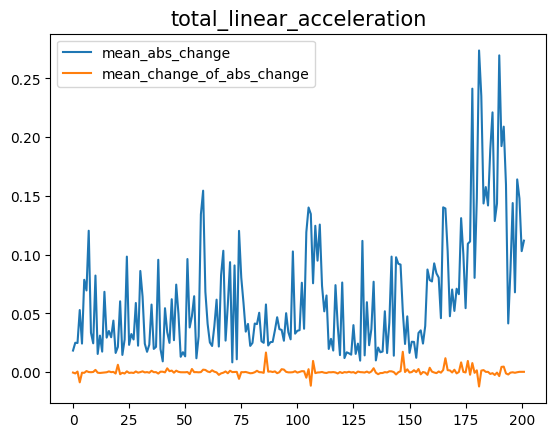

In [11]:
X2 = pd.read_csv('july/first_week/to_feat_ext_mpu1.csv')
X2.head()
plt.plot(X2.index, X2['total_linear_acceleration_mean_abs_change'], label='mean_abs_change')
plt.plot(X2.index, X2['total_linear_acceleration_mean_change_of_abs_change'], label='mean_change_of_abs_change')
plt.legend()
plt.title('total_linear_acceleration', fontsize=15)
#plt.savefig('May/third_week/total_linear_acceleration.png')
plt.show()

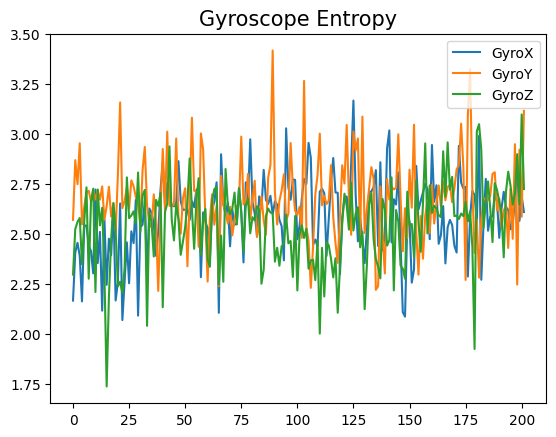

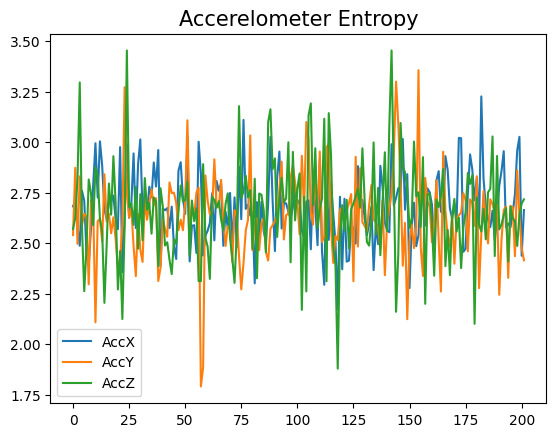

In [12]:
#cols = [col for col in df1.columns if col.endswith('_abs_max')]
# plot the selected columns
plt.plot(X2.index, X2['GyroX_entropy'], label='GyroX')
plt.plot(X2.index, X2['GyroY_entropy'], label='GyroY')
plt.plot(X2.index, X2['GyroZ_entropy'], label='GyroZ')
plt.legend()
plt.title('Gyroscope Entropy', fontsize=15)
#plt.savefig('May/third_week/Gyro_entropy.png')
plt.show()

# plot the selected columns
plt.plot(X2.index, X2['AccX_entropy'], label='AccX')
plt.plot(X2.index, X2['AccY_entropy'], label='AccY')
plt.plot(X2.index, X2['AccZ_entropy'], label='AccZ')
plt.legend()
plt.title('Accerelometer Entropy', fontsize=15)
#plt.savefig('May/third_week/Acc_entropy.png')
plt.show()

In [13]:
def fc(actual):
    tar = pd.DataFrame()
    for col in Class.columns:
        if col in ['series', 'time']:
            continue
        tar['Class'] = Class.groupby(['series'])[col].mean()
    return tar

In [14]:
Class = pd.read_csv("july/first_week/Ymotion_resize64_mpu1.csv")
Class.Class.value_counts()
tar = fc(Class)
tar.head()
tar.to_csv('july/first_week/Ymotion_resize_fe_mpu1.csv', index=False)

In [16]:
X = pd.read_csv("july/first_week/feat_ext64_mpu1.csv")

In [17]:
# normalize the columns instead of rows

def normalize_columns(actual):
    # Normalize the set of columns
    actual = actual.apply(lambda column: column/np.linalg.norm(column), axis=0)
    return actual

In [18]:
normalized_x = normalize_columns(X)
print(normalized_x)

     AccX_mean  AccX_min  AccX_max  AccX_std  AccX_max_to_min   
0     0.004128 -0.013354  0.017912  0.019534        -0.010053  \
1    -0.006501 -0.016865  0.013605  0.017858        -0.006046   
2    -0.003132 -0.023913  0.005939  0.012330        -0.001861   
3     0.028321 -0.037472  0.044720  0.036184        -0.008944   
4     0.056080 -0.005536  0.029719  0.026100        -0.040232   
..         ...       ...       ...       ...              ...   
197   0.074905 -0.054414  0.081869  0.080095        -0.011276   
198   0.070543 -0.025298  0.082082  0.045087        -0.024318   
199   0.021381 -0.101190  0.137048  0.082753        -0.010150   
200  -0.026679 -0.062821  0.031044  0.044864        -0.003704   
201   0.002600 -0.048673  0.030878  0.040405        -0.004755   

     AccX_mean_abs_change  AccX_mean_change_of_abs_change  AccX_abs_max   
0                0.021394                        0.003578      0.014950  \
1                0.019693                       -0.010979      0.0129

In [19]:
normalized_x.to_csv('july/first_week/feat_ext64_norm_mpu1.csv', index=False)